In [5]:
import pandas as pd
import os
import numpy as np
def preprocessingCSV(dir, datasetName, csvFilename, delim='comma', transform='log', cellRatio=0.99, geneRatio=0.99, geneCriteria='variance', geneSelectnum=2000, transpose=False, tabuCol=''):
    '''
    preprocessing CSV files:
    transform='log' or None
    '''
    expressionFilename = dir + datasetName
    if not os.path.exists(expressionFilename):
        print('Dataset ' + expressionFilename + ' not exists!')

    print('Input scRNA data in CSV format is validated, start reading...')

    tabuColList = []
    tmplist = tabuCol.split(",")
    for item in tmplist:
        tabuColList.append(item)

    df = pd.DataFrame()
    if delim == 'space':
        if len(tabuColList) == 0:
            df = pd.read_csv(expressionFilename, index_col=0,
                             delim_whitespace=True)
        else:
            df = pd.read_csv(expressionFilename, index_col=0, delim_whitespace=True,
                             usecols=lambda column: column not in tabuColList)
    elif delim == 'comma':
        if len(tabuColList) == 0:
            df = pd.read_csv(expressionFilename, index_col=0)
        else:
            df = pd.read_csv(expressionFilename, index_col=0,
                             usecols=lambda column: column not in tabuColList)
    print('Data loaded, start filtering...')
    print('Before preprocessing, {} genes'.format(df.shape[0]))
    print('Before preprocessing, {} cells'.format(df.shape[1]))
    if transpose == True:
        df = df.T
    df1 = df[df.astype('bool').mean(axis=1) >= (1-geneRatio)]
    print('After preprocessing, {} genes remaining'.format(df1.shape[0]))
    criteriaGene = df1.astype('bool').mean(axis=0) >= (1-cellRatio)
    df2 = df1[df1.columns[criteriaGene]]
    print('After preprocessing, {} cells have {} nonzero'.format(
        df2.shape[1], geneRatio))
    criteriaSelectGene = df2.var(axis=1).sort_values()[-geneSelectnum:]
    df3 = df2.loc[criteriaSelectGene.index]
    if transform == 'log':
        df3 = df3.transform(lambda x: np.log(x + 1))

In [6]:
preprocessingCSV("GSE60361/","GSE60361_C1-3005-Expression.txt","GSE60361/Use_expression.csv")

Input scRNA data in CSV format is validated, start reading...
Data loaded, start filtering...
Before preprocessing, 3694 genes
Before preprocessing, 3005 cells
After preprocessing, 3602 genes remaining
After preprocessing, 3005 cells have 0.99 nonzero


In [3]:
import pandas as pd

VAEGAT = pd.read_csv("/gpfs/gibbs/project/gerstein/zz465/gnn/train_roc_VAEGATModelVAE.csv")
VAEGAT = VAEGAT.transpose()
VAEGAT.columns = ["epoch","ROC"]
GAT = pd.read_csv("/gpfs/gibbs/project/gerstein/zz465/gnn/train_roc_GATModelVAE.csv")
GAT = GAT.transpose()
GAT.columns = ["epoch","ROC"]
GCN = pd.read_csv("/gpfs/gibbs/project/gerstein/zz465/gnn/train_roc_GCNModelVAE.csv")
GCN = GCN.transpose()
GCN.columns = ["epoch","ROC"]



,0,1
Unnamed: 0,0.0,1.000000
0,1.0,0.648093
1,2.0,0.675040
2,3.0,0.709090
3,4.0,0.734420
...,...,...
195,196.0,0.931970
196,197.0,0.931885
197,198.0,0.932359
198,199.0,0.932546


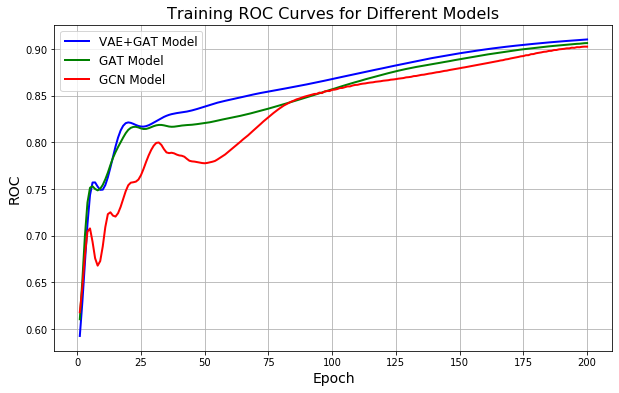

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and preprocess the data for each model
VAEGAT = pd.read_csv("/gpfs/gibbs/project/gerstein/zz465/gnn/train_roc_VAEGATModelVAE.csv")
VAEGAT = VAEGAT.transpose()
VAEGAT = VAEGAT.drop(index='Unnamed: 0').reset_index(drop=True)
VAEGAT.columns = ["epoch", "ROC"]

GAT = pd.read_csv("/gpfs/gibbs/project/gerstein/zz465/gnn/train_roc_GATModelVAE.csv")
GAT = GAT.transpose()
GAT = GAT.drop(index='Unnamed: 0').reset_index(drop=True)
GAT.columns = ["epoch", "ROC"]

GCN = pd.read_csv("/gpfs/gibbs/project/gerstein/zz465/gnn/train_roc_GCNModelVAE.csv")
GCN = GCN.transpose()
GCN = GCN.drop(index='Unnamed: 0').reset_index(drop=True)
GCN.columns = ["epoch", "ROC"]

# Plotting the data
plt.figure(figsize=(10, 6))

# Plot each line with labels
plt.plot(VAEGAT["epoch"], VAEGAT["ROC"], label="VAE+GAT Model", color="blue", linewidth=2)
plt.plot(GAT["epoch"], GAT["ROC"], label="GAT Model", color="green", linewidth=2)
plt.plot(GCN["epoch"], GCN["ROC"], label="GCN Model", color="red", linewidth=2)

# Add labels, title, and legend
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("ROC", fontsize=14)
plt.title("Training ROC Curves for Different Models", fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)

# Save the figure (optional) and show
plt.savefig("training_roc_comparison.png", dpi=300)  # Save figure as a PNG file
plt.show()
